In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import scipy as sp
import scipy.stats as stats
import scipy.optimize as optimization
from scipy.optimize import curve_fit
from scipy.linalg import lstsq
import itertools
from ipywidgets import IntSlider,interact


%matplotlib inline

In [128]:
df = pd.read_csv("../data/medical-data.csv",sep=";").astype(float)
df.columns = ['idade','peso','carga_final','vo2_max']
df = df[df['vo2_max'] < 10000]
xs = df["idade"].values
ys = df["carga_final"].values
zs = df["vo2_max"].values

In [70]:
np.ones(len(xs)).shape

(1168,)

In [71]:
a = np.array([1,2,3]);a

array([1, 2, 3])

In [72]:
b = np.array([4,5,6]);b

array([4, 5, 6])

In [73]:
c = np.vstack([a,b]);c

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
pars = np.polyfit(xs.values,ys.values,deg=1);pars

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [129]:
p1 = np.poly1d(pars)

@np.vectorize
def err_sq(y,y_hat):
    return(y-y_hat)

def err_sq_sum(ys,y_hats):
    return(np.sum( ((ys-y_hats)/10000) ** 2 ))

err_sq_sum(ys,p1(xs))

0.029880037327271968

In [182]:
mean_x = xs.max()/2
mean_y = ys.max()/2

dummy_xs = np.linspace(-ys.max()/2,ys.max()/2,20)
dummy_ys = np.linspace(0,ys.max(),20)

def get_z(pos,dist):
    return(dist.pdf(pos))

mean = [mean_x,mean_y]
cov = [[1,0],[0,1]]
dist= stats.multivariate_normal(mean=mean,cov=cov)

In [152]:
# X,Y = np.meshgrid(xs,ys)
# X.shape

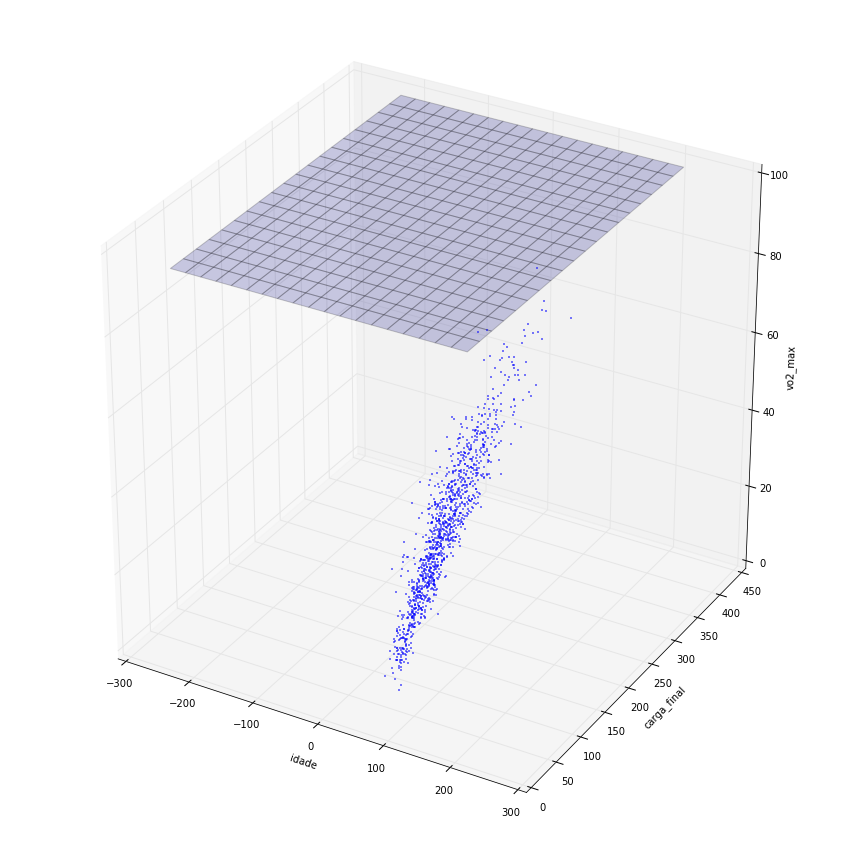

In [153]:
def v_get_z(xs,ys,dist):
    for x in xs:
        for y in ys:
            pos = (x,y)
            yield get_z(pos,dist) + 100

X,Y = np.meshgrid(dummy_xs, dummy_ys)

Z = np.array(list(v_get_z(dummy_xs,dummy_ys,dist))).reshape(20,20)     
            
fig = plt.figure(figsize=(15,15))

ax = fig.gca(projection='3d')

ax.plot(xs,ys,zs,'.',ms=2.0, label="Data")
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
plt.show()


In [155]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = optimization.leastsq(errorfunction, params)
    return p

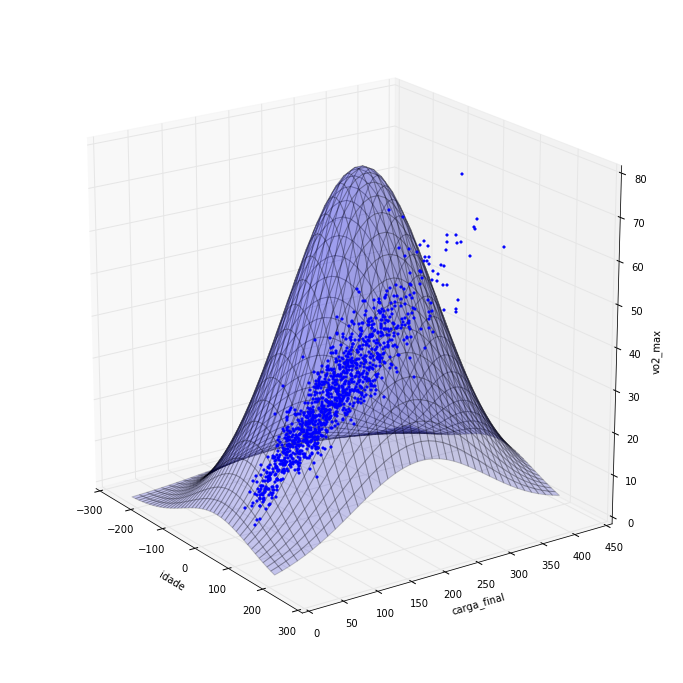

In [205]:


fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot(xs,ys,zs,'.',ms=5.0, label="Data")
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
# ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)

mean_x = xs.max()/2
mean_y = ys.max()/2

dummy_xs = np.linspace(-ys.max()/2,ys.max()/2,40)
dummy_ys = np.linspace(0,ys.max(),40)

Xin, Yin = np.meshgrid(dummy_xs, dummy_ys)
data = gaussian(80, mean_x, mean_y, 100, 100)(Xin, Yin) + np.random.random(Xin.shape)

data.shape

params = fitgaussian(data)
fit = gaussian(*params)

Z = fit(*np.indices(data.shape))

# print(Z.shape)

ax.plot_surface(Xin,Yin,Z,rstride=1,cstride=1,alpha=0.2)
ax.view_init(azim=-35,elev=20)
plt.show()
